# Sound propagation model data processing

This notebook brings in the sound propagation modeling results and links them to the occurrence records as produced from `presence_to_occurrence.ipynb`.

Sound propagation modeling data are available on Google Cloud at https://console.cloud.google.com/storage/browser/noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models;tab=objects?prefix=&forceOnObjectsSortingFiltering=false

We can use the [`gutil cp`](https://cloud.google.com/storage/docs/gsutil/commands/cp) command to recursively download files from Google Cloud to a local directory.

```
gutil cp -r gs://noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/ci01/sanctsound_ci01_propmodeling/data/
```

But we only want the netCDF data and we only want the `sound_propagation` value.

```
ds = xr.open_dataset('SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Apr_radarformat_highres.nc')
ds.variables['listening_range']

Out[6]:
<xarray.Variable (month: 1)>
array([2815])
Attributes:
    long_name:    distance_from_hydrophone_to_zero_SNR
    Description:  The median distance from the hydrophone to a zero signal-to...
    units:        m
```



In [1]:
import pandas as pd
import xarray as xr

# Function to download public files.

From https://cloud.google.com/storage/docs/access-public-data#storage-download-public-object-python

```
conda install google-cloud-storage
```

https://console.cloud.google.com/storage/browser/_details/noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/ci01/sanctsound_ci01_propmodeling/data/SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Apr_radarformat_highres.nc;tab=live_object

In [2]:
# Download the readme for the noaa-passive-bioacoustic bucket

from google.cloud import storage
import os

storage_client = storage.Client.create_anonymous_client()

bucket_name = 'noaa-passive-bioacoustic'
delimiter='/'
bucket=storage_client.get_bucket(bucket_name)
blobs=bucket.list_blobs(delimiter=delimiter) #List all objects that satisfy the filter.


for blob in blobs:
    print(blob.name)
    if not os.path.exists(blob.name):
        blob.download_to_filename(blob.name)

README.pdf


In [3]:
from IPython.display import IFrame

IFrame(blob.name, width=900, height=1200)

Install `gsutil` from https://cloud.google.com/storage/docs/gsutil_install

and recusively download netCDF files from `noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models`

gsutil uri for one of the datasets is:
```
gs://noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/ci01/sanctsound_ci01_propmodeling/data/SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Apr_radarformat_highres.nc
```

Data citation:
```
NOAA National Centers for Environmental Information. 2017. Passive Acoustic Data Collection. NOAA National Centers for Environmental Information.
https://doi.org/10.25921/PF0H-SQ72. access date
```

In [4]:
# for one station
#!gcloud storage ls gs://noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/sb03/**/*.nc
    
# for all stations

temp = !gcloud storage ls gs://noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/**/*.nc

print(f'Found {len(temp)} files:')    

for file in temp:
    print(file.split('/')[-1])

Found 924 files:
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Apr_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Jan_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Jul_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Oct_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ05000Hz_Apr_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ05000Hz_Jan_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ05000Hz_Jul_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ05000Hz_Oct_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0010m_SL185dB_FQ00125Hz_Apr_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0010m_SL185dB_FQ00125Hz_Jan_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0010m_SL185dB_FQ00125Hz_Jul_radarformat_highres.nc
SanctSound_CI01_propmodeling_SD0010m_SL185dB_FQ00125Hz_Oct_radarformat_highres.nc

In [5]:
## BE CAREFUL WITH THIS >900 FILES!
#  Operation completed over 924 objects/103.2 GiB.       
# ==> NOTE: You are performing a sequence of gsutil operations that may
# run significantly faster if you instead use gsutil -m cp ... Please
# see the -m section under "gsutil help options" for further information
# about when gsutil -m can be advantageous.
#
# !gsutil cp gs://noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/**/*.nc data\sound_propagation\

In [6]:
# Might be able to use xarray to grab data from gc:

# url = 'gs://noaa-passive-bioacoustic/sanctsound/products/sound_propagation_models/ci01/sanctsound_ci01_propmodeling/data/SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Apr_radarformat_highres.nc'

# xr.open_dataset(url,
#                 engine="netcdf4"
#                )

# Match occurrence data with Sound propagation model

Now we can bring in the occurrence data and determine how to link the two resources together.

Reminder, occurrence data was collected from https://coastwatch.pfeg.noaa.gov/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=noaaSanctSound

In [51]:
df_occur = pd.read_csv('data/occurrence.zip', compression='zip')

df_occur.head(5)

eventDate  station       vernacularName  \
0  2018-11-01  CI01_01             bocaccio   
1  2018-11-01  CI01_01       humpback whale   
2  2018-11-01  CI01_01  plainfin midshipman   
3  2018-11-01  CI02_01           blue whale   
4  2018-11-01  CI02_01             bocaccio   

                            scientificNameID          scientificName  \
0  urn:lsid:marinespecies.org:taxname:274833    Sebastes paucispinis   
1  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
3  urn:lsid:marinespecies.org:taxname:137090   Balaenoptera musculus   
4  urn:lsid:marinespecies.org:taxname:274833    Sebastes paucispinis   

  taxonRank   kingdom  decimalLatitude  decimalLongitude  \
0   Species  Animalia          34.0438         -120.0811   
1   Species  Animalia          34.0438         -120.0811   
2   Species  Animalia          34.0438         -120.0811   
3   Species  Animalia          34.0856         -120.5232   
4   Species  Animalia          34.0856         -120.5232   

   propagationFrequency                            occurrenceID  
0                   300             CI01_01_bocaccio_2018-11-01  
1                   300       CI01_01_humpback_whale_2018-11-01  
2                   300  CI01_01_plainfin_midshipman_2018-11-01  
3                    63           CI02_01_blue_whale_2018-11-01  
4                   300             CI02_01_bocaccio_2018-11-01

Let's collect unique station and locality identifiers to match to propagation results.

In [52]:
df_occur['occurrenceID'].str.split('_',expand=True)[0].unique()

array(['CI01', 'CI02', 'CI04', 'CI05', 'SB01', 'SB02', 'SB03', 'MB03',
       'MB01', 'MB02', 'GR01', 'FK01', 'FK03', 'FK02', 'OC02', 'OC01',
       'GR03', 'GR02', 'OC04', 'PM05', 'CI03', 'OC03', 'HI03', 'HI04'],
      dtype=object)

# Investigate downloaded sound propagation files

We only downloaded a subset of the propagation model data for testing. There are **924** files, so we should explore how we might be able to do this work without downloading all the data.

What does our sound propagation model output look like? Let's look at the first file that we downloaded.

In [53]:
import os

directory = 'data/sound_propagation/'

fname = os.listdir(directory)[0]

print(fname,'\n')

ds = xr.open_dataset(directory+fname, engine='netcdf4')

ds.info()

SanctSound_CI01_propmodeling_SD0001m_SL165dB_FQ01000Hz_Apr_radarformat_highres.nc 

xarray.Dataset {
dimensions:
	month = 1 ;
	depth = 1 ;
	bearing = 361 ;
	range = 13853 ;

variables:
	float64 month(month) ;
		month:long_name = month_of_climatological_sound_speed_profiles ;
		month:description = month # for GDEM sound speed profiles: 1-Jan, 2-Feb etc ;
		month:units = 1 ;
	float64 depth(depth) ;
		depth:long_name = sound_source_depth ;
		depth:description = Depth of the sound source ;
		depth:units = m ;
	float64 bearing(bearing) ;
		bearing:axis = Y ;
		bearing:long_name = true_north_bearing_from_hydrophone ;
		bearing:units = degrees_true ;
	float64 range(range) ;
		range:axis = X ;
		range:long_name = range_away_from_hydrophone ;
		range:units = km ;
	|S4 site() ;
		site:long_name = SanctSound_site_name ;
	float64 latitude(bearing, range) ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float64 longitude(bearing, range) ;
		longitude:standard_name = longi

We know we want the data from the variable `listening_range`.

In [54]:
ds['listening_range']

<xarray.DataArray 'listening_range' (month: 1)>
[1 values with dtype=int32]
Coordinates:
  * month    (month) float64 4.0
Attributes:
    long_name:    distance_from_hydrophone_to_zero_SNR
    Description:  The median distance from the hydrophone to a zero signal-to...
    units:        m

Grab all the `listening_range` data (in meters) with filenames to see if we can match to the occurrence data

In [55]:

df_listening_range = pd.DataFrame()

fnames = os.listdir(directory)

for fname in fnames:
    
    with xr.open_dataset(directory+fname, engine='netcdf4') as ds:
    
        df_temp = ds[['listening_range','depth','site']].to_dataframe().reset_index()

        # add additional data
        df_temp['fname'] = fname
        df_temp['site'] = df_temp['site'].values[0].decode('utf-8')
        df_temp['freq_Hz'] = int(ds.SoundSourcefrequency.replace('Hz','').strip())
        df_temp['hydrophone_depth_m'] = ds.HydrophoneDepth.replace('m','').strip()
        df_temp.rename(columns={'listening_range':'listening_range_m','month':'climatology'}, inplace=True)
        
        df_listening_range = pd.concat([df_listening_range, df_temp])
        
df_listening_range.sample(5)

climatology  depth  listening_range_m  site  \
0          4.0  114.0              13242  CI05   
0          7.0    1.0               2500  CI02   
0          7.0   10.0              22493  CI04   
0          7.0   10.0              18270  CI01   
0         10.0  387.0               2852  PM06   

                                               fname  freq_Hz  \
0  SanctSound_CI05_propmodeling_SD0114m_SL176dB_F...    12000   
0  SanctSound_CI02_propmodeling_SD0001m_SL165dB_F...     5000   
0  SanctSound_CI04_propmodeling_SD0010m_SL185dB_F...      125   
0  SanctSound_CI01_propmodeling_SD0010m_SL185dB_F...      125   
0  SanctSound_PM06_propmodeling_SD0387m_SL176dB_F...    12000   

  hydrophone_depth_m  
0              114.0  
0               73.5  
0              152.5  
0               17.5  
0              386.0

Print out the dataframe to share via chat

In [12]:
# pd.set_option('display.max_colwidth', None)

# columns = [ 'site','month','freq_Hz', 'depth', 'listening_range_m']

# print(df_listening_range.sort_values(by=columns, ascending=True).to_csv(columns=columns,index=False))

Find occurrence records associated with the station `CI01`.

In [56]:
df_occur.loc[df_occur['occurrenceID'].str.contains('CI01')]

eventDate  station       vernacularName  \
0      2018-11-01  CI01_01             bocaccio   
1      2018-11-01  CI01_01       humpback whale   
2      2018-11-01  CI01_01  plainfin midshipman   
9      2018-11-02  CI01_01             bocaccio   
10     2018-11-02  CI01_01       humpback whale   
...           ...      ...                  ...   
21747  2021-09-07  CI01_08  plainfin midshipman   
21762  2021-09-08  CI01_08  plainfin midshipman   
21777  2021-09-09  CI01_08  plainfin midshipman   
21792  2021-09-10  CI01_08  plainfin midshipman   
21808  2021-09-11  CI01_08  plainfin midshipman   

                                scientificNameID          scientificName  \
0      urn:lsid:marinespecies.org:taxname:274833    Sebastes paucispinis   
1      urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2      urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
9      urn:lsid:marinespecies.org:taxname:274833    Sebastes paucispinis   
10     urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
...                                          ...                     ...   
21747  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
21762  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
21777  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
21792  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
21808  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   

      taxonRank   kingdom  decimalLatitude  decimalLongitude  \
0       Species  Animalia          34.0438         -120.0811   
1       Species  Animalia          34.0438         -120.0811   
2       Species  Animalia          34.0438         -120.0811   
9       Species  Animalia          34.0438         -120.0811   
10      Species  Animalia          34.0438         -120.0811   
...         ...       ...              ...               ...   
21747   Species  Animalia          34.0436         -120.0803   
21762   Species  Animalia          34.0436         -120.0803   
21777   Species  Animalia          34.0436         -120.0803   
21792   Species  Animalia          34.0436         -120.0803   
21808   Species  Animalia          34.0436         -120.0803   

       propagationFrequency                            occurrenceID  
0                       300             CI01_01_bocaccio_2018-11-01  
1                       300       CI01_01_humpback_whale_2018-11-01  
2                       300  CI01_01_plainfin_midshipman_2018-11-01  
9                       300             CI01_01_bocaccio_2018-11-02  
10                      300       CI01_01_humpback_whale_2018-11-02  
...                     ...                                     ...  
21747                   300  CI01_08_plainfin_midshipman_2021-09-07  
21762                   300  CI01_08_plainfin_midshipman_2021-09-08  
21777                   300  CI01_08_plainfin_midshipman_2021-09-09  
21792                   300  CI01_08_plainfin_midshipman_2021-09-10  
21808                   300  CI01_08_plainfin_midshipman_2021-09-11  

[963 rows x 11 columns]

Now find the **listening ranges** for station `CI01` for the January climatology (month = 1.0).

In [57]:
df_listening_range.loc[(df_listening_range['site']=='CI01') & (df_listening_range['climatology']==1.0)].sort_values(by=['freq_Hz'])

climatology  depth  listening_range_m  site  \
0          1.0   15.0               4861  CI01   
0          1.0   20.0              15001  CI01   
0          1.0   10.0              18270  CI01   
0          1.0   20.0               9492  CI01   
0          1.0    1.0               4593  CI01   
0          1.0    1.0               3028  CI01   
0          1.0   19.0               7325  CI01   

                                               fname  freq_Hz  \
0  SanctSound_CI01_propmodeling_SD0015m_SL189dB_F...       20   
0  SanctSound_CI01_propmodeling_SD0020m_SL192dB_F...       63   
0  SanctSound_CI01_propmodeling_SD0010m_SL185dB_F...      125   
0  SanctSound_CI01_propmodeling_SD0020m_SL170dB_F...      300   
0  SanctSound_CI01_propmodeling_SD0001m_SL165dB_F...     1000   
0  SanctSound_CI01_propmodeling_SD0001m_SL165dB_F...     5000   
0  SanctSound_CI01_propmodeling_SD0019m_SL176dB_F...    12000   

  hydrophone_depth_m  
0               17.5  
0               17.5  
0               17.5  
0               17.5  
0               17.5  
0               17.5  
0               17.5

Let's look at the SanctSound website and see how we might be able to link these together.

https://sanctsound.portal.axds.co/#sanctsound/sanctuary/channel-islands/site/CI01

Since propagation model data are separated into quarterly observations on months 1, 4, 7, and 10. We can use pandas to group by quarters starting in January.

In [58]:
df_occur['eventDate'] = pd.to_datetime(df_occur['eventDate'])

df_occur['site'] = df_occur['occurrenceID'].str.split("_",expand=True)[0]

df_occur.sample(5)

eventDate  station vernacularName  \
22394 2021-10-17  CI05_08     blue whale   
1308  2018-12-26  SB02_01      fin whale   
6021  2019-08-23  SB03_05      fin whale   
1992  2019-02-10  FK01_01  black grouper   
6168  2019-08-28  CI04_03        dolphin   

                                scientificNameID         scientificName  \
22394  urn:lsid:marinespecies.org:taxname:137090  Balaenoptera musculus   
1308   urn:lsid:marinespecies.org:taxname:137091  Balaenoptera physalus   
6021   urn:lsid:marinespecies.org:taxname:137091  Balaenoptera physalus   
1992   urn:lsid:marinespecies.org:taxname:159231    Mycteroperca bonaci   
6168     urn:lsid:marinespecies.org:taxname:2688                Cetacea   

        taxonRank   kingdom  decimalLatitude  decimalLongitude  \
22394     Species  Animalia        34.018000       -119.316800   
1308      Species  Animalia        42.470793        -70.242940   
6021      Species  Animalia        42.255517        -70.179065   
1992      Species  Animalia        24.433130        -81.930680   
6168   Infraorder  Animalia        33.848880       -120.117000   

       propagationFrequency                      occurrenceID  site  
22394                    63     CI05_08_blue_whale_2021-10-17  CI05  
1308                     20      SB02_01_fin_whale_2018-12-26  SB02  
6021                     20      SB03_05_fin_whale_2019-08-23  SB03  
1992                    125  FK01_01_black_grouper_2019-02-10  FK01  
6168                   5000        CI04_03_dolphin_2019-08-28  CI04

Map the months to the appropriate climatology

Months | Climatology
-------|------------
1,2,3 | 1
4,5,6 | 4
7,8,9 | 7
10,11,12 | 10

See this gist for confirmation they line up: <https://gist.github.com/ocefpaf/412a6ddcfa3524862160653f1718da5f>

In [59]:
df_occur['climatology'] = pd.Series(dtype=float)

mask = (df_occur['eventDate'].dt.quarter==1)

df_occur.loc[mask,'climatology'] = 1

mask = (df_occur['eventDate'].dt.quarter==2)

df_occur.loc[mask,'climatology'] = 4

mask = (df_occur['eventDate'].dt.quarter==3)

df_occur.loc[mask,'climatology'] = 7

mask = (df_occur['eventDate'].dt.quarter==4)

df_occur.loc[mask, 'climatology'] = 10

# Do the combining

 Use [DataFrame.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to combine the datasets together.
 
 First, however, we pick an appropriate frequency. Luckily, we can already collected the frequency in the [SanctSound_SpeciesLookupTable.csv](https://github.com/MathewBiddle/bio_data_guide/blob/sanctsound/datasets/SanctSound/SanctSound_SpeciesLookupTable.csv), under the `propagationFrequency` column. These frequencies we determined based on the approximate ranges by which calls are typically observed for each species. It is a 'best guess'.

In [125]:
df_occur.rename(columns={'propagationFrequency':'freq_Hz'}, inplace=True)

df_combined = df_occur.merge(df_listening_range,how='left', on=['site','climatology','freq_Hz'], indicator=True)

df_combined.sample(10)

eventDate  station       vernacularName  \
16620 2020-10-05  SB02_12         atlantic cod   
18657 2020-12-17  CI03_05           blue whale   
20981 2021-07-07  OC02_05       humpback whale   
17502 2020-11-03  SB03_12              dolphin   
1785  2019-01-25  FK01_01          red grouper   
21204 2021-07-31  CI03_06  plainfin midshipman   
1350  2018-12-28  SB02_01              dolphin   
7739  2019-10-15  CI04_03            fin whale   
11521 2020-02-28  MB02_04              dolphin   
15548 2020-08-22  CI03_04  plainfin midshipman   

                                scientificNameID          scientificName  \
16620  urn:lsid:marinespecies.org:taxname:126436            Gadus morhua   
18657  urn:lsid:marinespecies.org:taxname:137090   Balaenoptera musculus   
20981  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
17502    urn:lsid:marinespecies.org:taxname:2688                 Cetacea   
1785   urn:lsid:marinespecies.org:taxname:159354       Epinephelus morio   
21204  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   
1350     urn:lsid:marinespecies.org:taxname:2688                 Cetacea   
7739   urn:lsid:marinespecies.org:taxname:137091   Balaenoptera physalus   
11521    urn:lsid:marinespecies.org:taxname:2688                 Cetacea   
15548  urn:lsid:marinespecies.org:taxname:275658      Porichthys notatus   

        taxonRank   kingdom  decimalLatitude  decimalLongitude  freq_Hz  \
16620     Species  Animalia        42.470830        -70.242287       63   
18657     Species  Animalia        33.486750       -119.016070       63   
20981     Species  Animalia        48.490450       -124.003500      300   
17502  Infraorder  Animalia        42.255080        -70.179047     5000   
1785      Species  Animalia        24.433130        -81.930680      125   
21204     Species  Animalia        33.486800       -119.016000      300   
1350   Infraorder  Animalia        42.470793        -70.242940     5000   
7739      Species  Animalia        33.848880       -120.117000       20   
11521  Infraorder  Animalia        36.649500       -121.908400     5000   
15548     Species  Animalia        33.486750       -119.016070      300   

                                 occurrenceID  site  climatology  depth  \
16620         SB02_12_atlantic_cod_2020-10-05  SB02         10.0   20.0   
18657           CI03_05_blue_whale_2020-12-17  CI03         10.0   20.0   
20981       OC02_05_humpback_whale_2021-07-07  OC02          7.0   20.0   
17502              SB03_12_dolphin_2020-11-03  SB03         10.0    1.0   
1785           FK01_01_red_grouper_2019-01-25  FK01          1.0   10.0   
21204  CI03_06_plainfin_midshipman_2021-07-31  CI03          7.0   20.0   
1350               SB02_01_dolphin_2018-12-28  SB02         10.0    1.0   
7739             CI04_03_fin_whale_2019-10-15  CI04         10.0   15.0   
11521              MB02_04_dolphin_2020-02-28  MB02          1.0    1.0   
15548  CI03_04_plainfin_midshipman_2020-08-22  CI03          7.0   20.0   

       listening_range_m                                              fname  \
16620              80358  SanctSound_SB02_propmodeling_SD0020m_SL192dB_F...   
18657              74895  SanctSound_CI03_propmodeling_SD0020m_SL192dB_F...   
20981              54060  SanctSound_OC02_propmodeling_SD0020m_SL170dB_F...   
17502               3065  SanctSound_SB03_propmodeling_SD0001m_SL165dB_F...   
1785               83951  SanctSound_FK01_propmodeling_SD0010m_SL185dB_F...   
21204              11186  SanctSound_CI03_propmodeling_SD0020m_SL170dB_F...   
1350                3297  SanctSound_SB02_propmodeling_SD0001m_SL165dB_F...   
7739              101425  SanctSound_CI04_propmodeling_SD0015m_SL189dB_F...   
11521               3639  SanctSound_MB02_propmodeling_SD0001m_SL165dB_F...   
15548              11186  SanctSound_CI03_propmodeling_SD0020m_SL170dB_F...   

      hydrophone_depth_m _merge  
16620               66.0   both  
18657               22.7   bo

Rename listening range for DarwinCore alignment

In [126]:
df_combined.rename(columns={'listening_range_m':'coordinateUncertaintyInMeters'}, inplace=True)

# Depth check against GEBCO

In [127]:
def etopo_depth(df):
    
    df['bathy'] = np.nan
    
    for index, row in df.iterrows():
        base_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/GEBCO_2020.csvp?'
        query_url = 'elevation%5B({})%5D%5B({})%5D'.format(row['decimalLatitude'],row['decimalLongitude'])
        url = base_url+query_url
        bathy = pd.read_csv(url)
        
        df.at[index,'bathy'] = bathy['elevation (m)']

    return df

In [170]:
df_coords = df_combined[['decimalLatitude','decimalLongitude']].copy()

df_group = df_coords.groupby(['decimalLatitude','decimalLongitude']).size().reset_index().rename(columns={0:'count'})

df_bathy = etopo_depth(df_group)

df_bathy

decimalLatitude  decimalLongitude  count  bathy
0          21.285420       -157.600120    184  -80.0
1          22.263472       -159.586389    160  -83.0
2          24.433130        -81.930680    373  -31.0
3          24.458950        -81.774133    129  -30.0
4          24.488800        -81.666316    111  -14.0
..               ...               ...    ...    ...
114        48.393800       -124.620670    180  -39.0
115        48.490300       -125.003700    126  -92.0
116        48.490400       -125.003800     20  -92.0
117        48.490450       -124.003500    194  495.0
118        48.490500       -125.003900    254  -92.0

[119 rows x 4 columns]

In [185]:
#df_combined['neg_maximumDepthInMeters'] = -1*df_combined['depth']
   
print('Stations where depth is deeper than GEBCO bathymetry:')

df_merged = df_combined.merge(df_bathy, how='left', on=['decimalLatitude','decimalLongitude'])

print(df_merged.loc[df_merged['depth'] < df_merged['bathy'],'station'].unique())

df_merged.loc[df_merged['depth'] < df_merged['bathy'], ['depth','bathy']]

Stations where depth is deeper than GEBCO bathymetry:
['OC02_05']


depth  bathy
20790   20.0  495.0
20798   20.0  495.0
20803   20.0  495.0
20810   20.0  495.0
20811    1.0  495.0
...      ...    ...
22497   20.0  495.0
22511   20.0  495.0
22525   20.0  495.0
22538   20.0  495.0
22552   20.0  495.0

[194 rows x 2 columns]

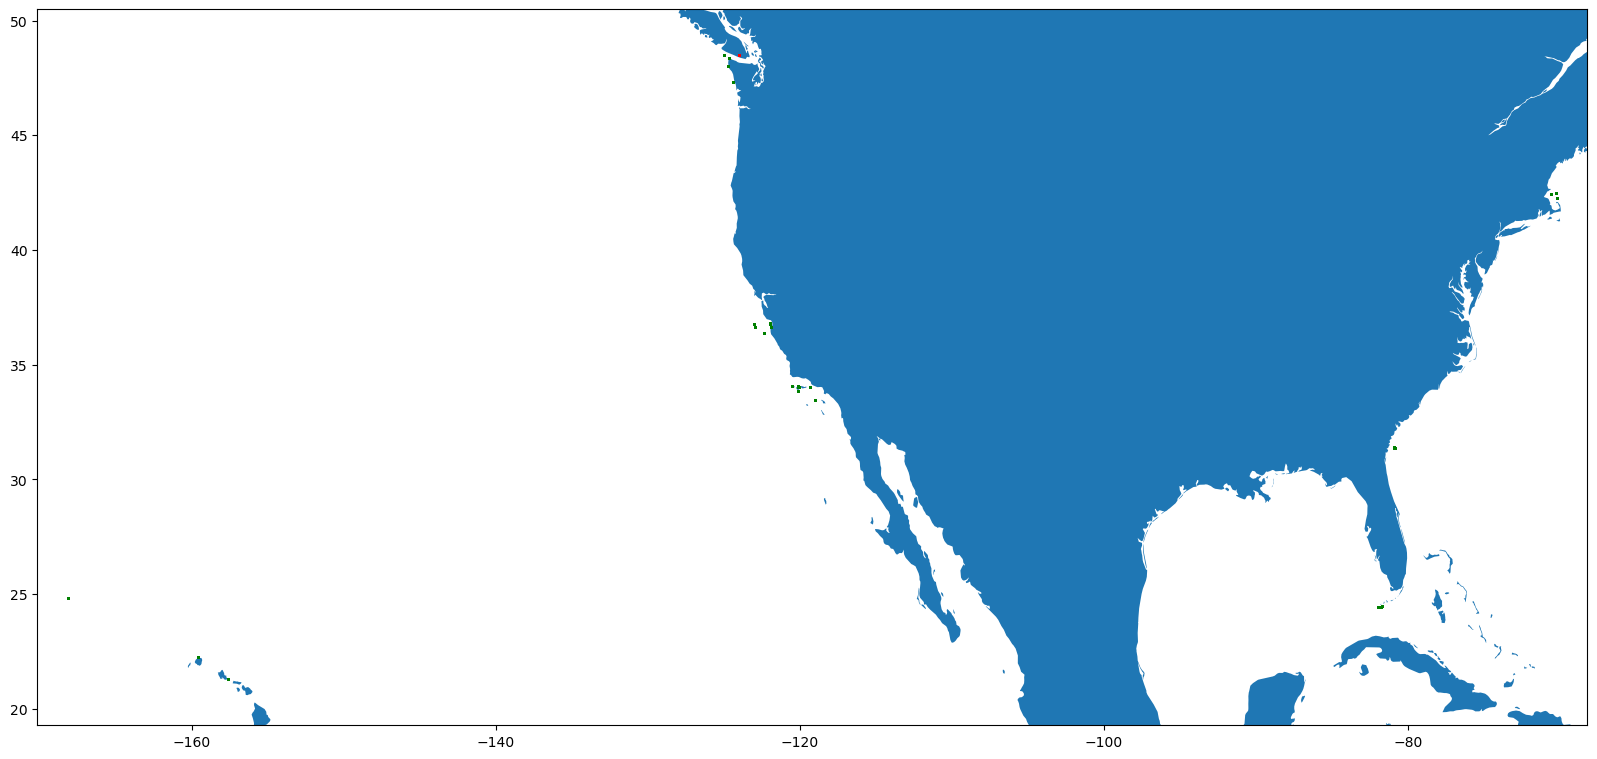

In [146]:
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import shapely.geometry as sgeom
from shapely.ops import unary_union
from shapely.prepared import prep
import matplotlib.pyplot as plt

df = df_merged #.loc[df_merged['depth'] < df_merged['bathy']]

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.decimalLongitude, df.decimalLatitude), crs='WGS84')
   
land_shp_fname = shpreader.natural_earth(resolution='50m',
                                       category='physical', name='land')
   
land_geom = unary_union(list(shpreader.Reader(land_shp_fname).geometries()))
land = prep(land_geom)
   
for index, row in gdf.iterrows():
    gdf.loc[index, 'on_land'] = land.contains(row.geometry)
   
fig, axs = plt.subplots(figsize=(20,20))#ncols=1,nrows=1)

# Make a map:
xlim = ([gdf.total_bounds[0]-2,  gdf.total_bounds[2]+2])
ylim = ([gdf.total_bounds[1]-2,  gdf.total_bounds[3]+2])

axs.set_xlim(xlim)
axs.set_ylim(ylim)

gpd.read_file(land_shp_fname).plot(ax=axs)
   
gdf.loc[gdf['on_land']==False].plot(ax=axs, color='green', markersize=1)
gdf.loc[gdf['on_land']==True].plot(ax=axs, color='red', markersize=1)

plt.show()

In [158]:
gdf[['geometry','on_land','occurrenceID']].explore("on_land", cmap="RdYlGn_r",popup=True)

In [187]:
temp = df_combined.set_index(pd.to_datetime(df_combined['eventDate']))

temp.loc[temp['occurrenceID']=='OC02_05_humpback_whale_2021-10-27','fname'].tolist()

['SanctSound_OC02_propmodeling_SD0020m_SL170dB_FQ00300Hz_Oct_radarformat_highres.nc']

In [184]:
temp.loc[(temp['station']=='OC02_05') & (temp['vernacularName'] == 'humpback whale')]

eventDate  station  vernacularName  \
eventDate                                        
2021-06-09 2021-06-09  OC02_05  humpback whale   
2021-06-10 2021-06-10  OC02_05  humpback whale   
2021-06-11 2021-06-11  OC02_05  humpback whale   
2021-06-12 2021-06-12  OC02_05  humpback whale   
2021-06-13 2021-06-13  OC02_05  humpback whale   
...               ...      ...             ...   
2021-10-23 2021-10-23  OC02_05  humpback whale   
2021-10-24 2021-10-24  OC02_05  humpback whale   
2021-10-25 2021-10-25  OC02_05  humpback whale   
2021-10-26 2021-10-26  OC02_05  humpback whale   
2021-10-27 2021-10-27  OC02_05  humpback whale   

                                     scientificNameID          scientificName  \
eventDate                                                                       
2021-06-09  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-06-10  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-06-11  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-06-12  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-06-13  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
...                                               ...                     ...   
2021-10-23  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-10-24  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-10-25  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-10-26  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   
2021-10-27  urn:lsid:marinespecies.org:taxname:137092  Megaptera novaeangliae   

           taxonRank   kingdom  decimalLatitude  decimalLongitude  freq_Hz  \
eventDate                                                                    
2021-06-09   Species  Animalia         48.49045         -124.0035      300   
2021-06-10   Species  Animalia         48.49045         -124.0035      300   
2021-06-11   Species  Animalia         48.49045         -124.0035      300   
2021-06-12   Species  Animalia         48.49045         -124.0035      300   
2021-06-13   Species  Animalia         48.49045         -124.0035      300   
...              ...       ...              ...               ...      ...   
2021-10-23   Species  Animalia         48.49045         -124.0035      300   
2021-10-24   Species  Animalia         48.49045         -124.0035      300   
2021-10-25   Species  Animalia         48.49045         -124.0035      300   
2021-10-26   Species  Animalia         48.49045         -124.0035      300   
2021-10-27   Species  Animalia         48.49045         -124.0035      300   

            ... climatology depth  coordinateUncertaintyInMeters  \
eventDate   ...                                                    
2021-06-09  ...         4.0  20.0                          44531   
2021-06-10  ...         4.0  20.0                          44531   
2021-06-11  ...         4.0  20.0                          44531   
2021-06-12  ...         4.0  20.0                          44531   
2021-06-13  ...         4.0  20.0                          44531   
...         ...         ...   ...                            ...   
2021-10-23  ...        10.0  20.0                          44050   
2021-10-24  ...        10.0  20.0                          44050   
2021-10-25  ...        10.0  20.0                          44050   
2021-10-26  ...        10.0  20.0                          44050   
2021-10-27  ...        10.0  20.0                          44050   

                                                        fname  \
eventDate                                                       
2021-06-09  SanctSound_OC02_propmodeling_SD0020m_SL170dB_F...   
2021-06-10  SanctSound_OC02_propmodeling_SD0020m_SL170dB_F...   
2021-06-11  SanctSound_OC02_propmodeling_SD0020m_SL170dB_F...   
2021-06-12  SanctSound_OC02_propmodeling_SD0020m_SL170dB_F...   
2021-06-13  Sanct

# Add in missing columns

Also check for other items at https://ioos.github.io/bio_mobilization_workshop/06-qa-qc/index.html#recommended-initial-checks-on-your-data

In [137]:
req_cols = ['occurrenceID','countryCode', 'kingdom', 'geodeticDatum', 'eventDate', 'decimalLongitude', 'decimalLatitude', 'scientificName', 'scientificNameID', 'occurrenceStatus', 'basisOfRecord']
missing_cols = []
for col in req_cols:
    if col not in df_combined.columns:
        print('Column {} is missing.'.format(col))

#missing_cols

In [138]:
df_combined['countryCode'] = 'US'
df_combined['geodeticDatum'] = 'WGS84'
df_combined['occurrenceStatus'] = 'present'
df_combined['basisOfRecord'] = 'MachineObservation'

req_cols = ['occurrenceID','countryCode', 'kingdom', 'geodeticDatum', 'eventDate', 'decimalLongitude', 'decimalLatitude', 'scientificName', 'scientificNameID', 'occurrenceStatus', 'basisOfRecord']
missing_cols = []
for col in req_cols:
    if col not in df_combined.columns:
        missing_cols.append('Column {} is missing.'.format(col))

missing_cols

[]

# Check dates

In [139]:
for date in df_combined['eventDate']:
    try:
        pd.to_datetime(date)
    except:
        print("Date",date,"might not follow ISO 8601")

# Remove unneeded columns

In [140]:
df_combined.columns

Index(['eventDate', 'station', 'vernacularName', 'scientificNameID',
       'scientificName', 'taxonRank', 'kingdom', 'decimalLatitude',
       'decimalLongitude', 'freq_Hz', 'occurrenceID', 'site', 'climatology',
       'depth', 'coordinateUncertaintyInMeters', 'fname', 'hydrophone_depth_m',
       '_merge', 'countryCode', 'geodeticDatum', 'occurrenceStatus',
       'basisOfRecord'],
      dtype='object')

In [141]:
df_dwc_terms = pd.read_csv('https://raw.githubusercontent.com/tdwg/dwc/master/vocabulary/term_versions.csv')

for term in df_combined.columns.tolist():
    
    if not df_dwc_terms['term_localName'].str.contains(term).any():
        
        print(f'{term} not valid DwC term')


station not valid DwC term
freq_Hz not valid DwC term
site not valid DwC term
climatology not valid DwC term
depth not valid DwC term
fname not valid DwC term
hydrophone_depth_m not valid DwC term
_merge not valid DwC term


In [142]:
df_final = df_combined.drop(columns=
                 ['freq_Hz',
                  'site',
                  'climatology',
                  'depth',
                  'fname',
                  'hydrophone_depth_m',
                  '_merge',
                  'station'
                 ], 
                )

df_final.columns.tolist()

['eventDate',
 'vernacularName',
 'scientificNameID',
 'scientificName',
 'taxonRank',
 'kingdom',
 'decimalLatitude',
 'decimalLongitude',
 'occurrenceID',
 'coordinateUncertaintyInMeters',
 'countryCode',
 'geodeticDatum',
 'occurrenceStatus',
 'basisOfRecord']

# Save as occurrence record

In [143]:
df_combined.to_csv('data/occurrence_w_coordinateUncertainty.zip', compression='zip')

In [190]:
ds = xr.open_dataset('data/sound_propagation/SanctSound_OC02_propmodeling_SD0020m_SL170dB_FQ00300Hz_Oct_radarformat_highres.nc')

ds.info()

xarray.Dataset {
dimensions:
	month = 1 ;
	depth = 1 ;
	bearing = 361 ;
	range = 13861 ;

variables:
	float64 month(month) ;
		month:long_name = month_of_climatological_sound_speed_profiles ;
		month:description = month # for GDEM sound speed profiles: 1-Jan, 2-Feb etc ;
		month:units = 1 ;
	float64 depth(depth) ;
		depth:long_name = sound_source_depth ;
		depth:description = Depth of the sound source ;
		depth:units = m ;
	float64 bearing(bearing) ;
		bearing:axis = Y ;
		bearing:long_name = true_north_bearing_from_hydrophone ;
		bearing:units = degrees_true ;
	float64 range(range) ;
		range:axis = X ;
		range:long_name = range_away_from_hydrophone ;
		range:units = km ;
	|S4 site() ;
		site:long_name = SanctSound_site_name ;
	float64 latitude(bearing, range) ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float64 longitude(bearing, range) ;
		longitude:standard_name = longitude ;
		longitude:units = degrees_east ;
	float64 received_level(bearing, range) ;
